In [111]:
from imdb import Cinemagoer
import matplotlib.pyplot as plt
import threading
import time
import mplcursors
dico_th = {}
dico = {}
liste = []
lst_movies = []
lst_persons = []
ia = Cinemagoer()

In [112]:
def run_in_thread(f):
    def func(*args):
        while threading.active_count() > 12:
            time.sleep(0.5)
        th = threading.Thread(target=f, args=args)
        dico_th[th] = args[0]
        th.start()
        return th
    return func

In [113]:
def search_person(pers):
    # fonction de recherche pour chaque personne
    try:
        persons = ia.search_person(pers)
        person = ia.get_person(persons[0].personID)
        # on utilise la même liste en remplaçant les str
        # par les objets Person
        lst_persons.remove(pers) 
        lst_persons.insert(0, person)
    except:
        print(f'search_person, {pers} not found.')

In [114]:
def get_person(name):
    persons = ia.search_person(name)
    person = ia.get_person(persons[0].personID)
    return person

In [115]:
def get_genre(person):
    if 'actress' in person.get('filmography'):
        return 'actress'
    return 'actor'

In [116]:

def search_movie(film):
    # fonction de recherche pour chaque film
    if isinstance(film, str): # vérifie si str ou obj Movie
        movie = ia.search_movie(film)[0]
    movie = ia.get_movie(film.movieID)
    lst_movies.append(movie)

In [117]:

def search_lst_movies():
    # recherche de la liste de films via api
    lst_temp = []
    [lst_temp.append(i) for i in lst_movies]
    lst_movies.clear()

    for m in lst_temp:
        search_movie(m)
        if len(dico.keys()) % 3 == 0:
            for th in dico.keys():
                th.join()

    [lst_movies.remove(i) for i in lst_movies if i is None]

In [118]:
def search_lst_persons():
    # recherche de la liste de personnes via api
    for p in lst_persons:
        search_person(p)    

    # vérification de la recherche
    [lst_persons.remove(i) for i in lst_persons if i is None]
    if isinstance(lst_persons[0], str) or isinstance(lst_persons[0], int):
        print('Nobody found.')
        sys.exit()

In [119]:
def get_genre_person(person):
    # cherche si c'est un acteur et détermine le genre   
    if 'actress' in person['filmography']:
        return 'actress'
    return 'actor'   

In [120]:
def get_filmo(person, isdir=False):
    # renvoie la filmo grâce au genre : actor/actress
    try:
        if isinstance(person, str):
            lst_persons.append(person)
            search_lst_persons()
            person = lst_persons[0]
        
        if isdir and 'director' in person.get('filmography'):
            liste = []
            # on retourne uniquement les films d'un réal 
            [liste.append(i) for i in person.get('director') if i.get('kind') == 'movie']
            return liste
        
        genre = get_genre_person(person)
        return  person.get(genre)
    except:
        return [] 

In [121]:
x, y = [], []
def onpick(event):
    ind = event.ind
    x1 = x[int(ind)] 
    y1 = y[int(ind)]
    test = ''
    for i in lst_movies:
        try:
            if i.get('year') == x1 and i.get('rating') == y1:
                test = i.get('title') 
        except:
            continue
    plt.annotate(f'{test} ({x1}), {y1}', xy=(x1, y1), xytext=(x1, y1))
    plt.draw()

In [133]:
def plot(name, isdir=False, n=None):
    """Affiche un graphique des notes des n derniers films d'une personne"""
    global lst_movies, x, y
    temp_lst = []
    # récupère les n derniers films d'une personne
    lst_movies = get_filmo(name, isdir)[:n]
    search_lst_movies()
    # tri des films sans date ou note
    for i in lst_movies:
        if i.get('year') is not None and i.get('rating') is not None:
            temp_lst.append(i)

    temp_lst.sort(key=lambda i: i.get('year'))
    # association date et note pour le graph
    x = [i.get('year') for i in temp_lst]
    y = [i.get('rating') for i in temp_lst]
    titles =  [i.get('title') for i in temp_lst]
    # création de l'event click sur le scatter
    fig, ax = plt.subplots()
    fig.canvas.mpl_connect('pick_event', onpick)
  
    # calcul scatter dots
    colors = [i for i in y]
    sizes = [i * 75 for i in y]
    # création du graph
    scatter = plt.scatter(x, y, picker=True, c=colors, s=sizes, alpha=0.5, cmap='RdYlGn',
                 label=ia.search_person(name)[0])
    plt.clim(1, 10)
    #plt.plot(x, y, label=ia.search_person(name)[0].get('name'))
    # création event hover
    mplcursors.cursor(scatter, hover=True).connect('add', lambda x: x.annotation.set_text(titles[x.target.index]))
    plt.colorbar()
    plt.legend()
    plt.show()


In [123]:
def get_mean(name, isdir=False):
    person = get_person(name)
    search_movies(get_filmo(person, isdir))
    
    liste.sort(key=lambda x: x.get('year'))
    
    x = [i.get('year') for i in lstfilms]
    y = [i.get('rating') for i in lstfilms]
    
    note = 0
    for n in liste:
        if n.get('rating') is not None:
            note += n.get('rating')

    note = note / len(liste)
    print(note)

search_person, Bruce Willis not found.
search_person, Jake Lloyd not found.
search_person, Danny Lloyd not found.
search_person, Danny Lloyd not found.
search_person, Danny Lloyd not found.
search_person, Danny Lloyd not found.
search_person, Danny Lloyd not found.
search_person, Danny Lloyd not found.


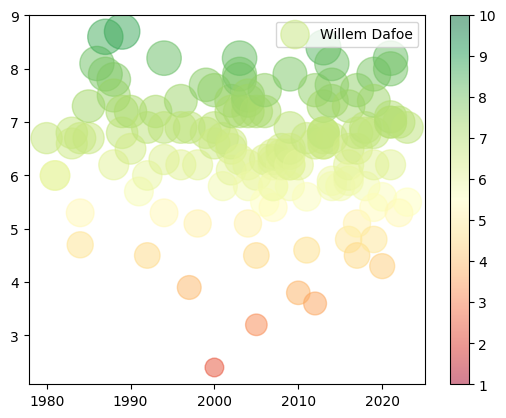

In [137]:
plot('willem dafoe')

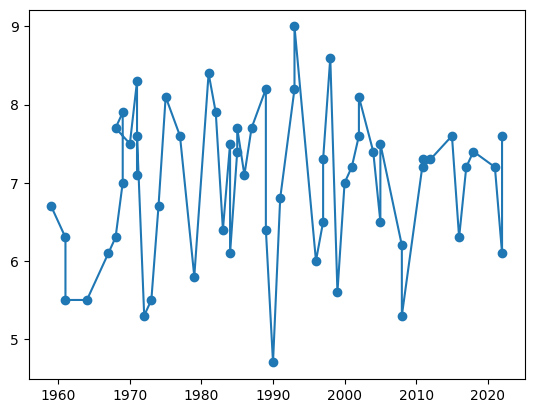

In [ ]:
'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG',
'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 
'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens',
'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges',
'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1',
'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 
'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r',
'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 
'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1',
'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 
'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr',
'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r',
'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis',
'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 
'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r',
'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar',
'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r',
'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r',
'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r',
'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r',
'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r',
'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r',
'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b',
'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 
'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis',
'viridis_r', 'winter', 'winter_r'


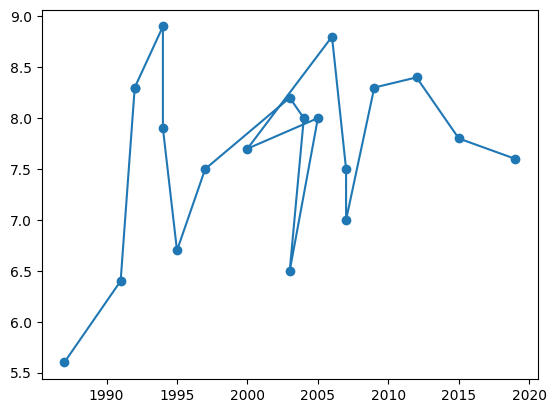

In [ ]:
test('tarantino')

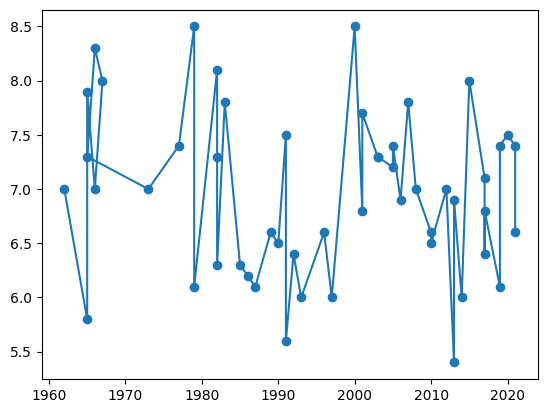

In [ ]:
test('ridley scott')

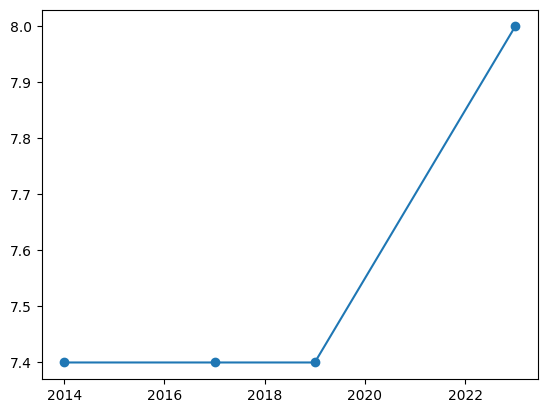

In [ ]:
test('stahelsky')

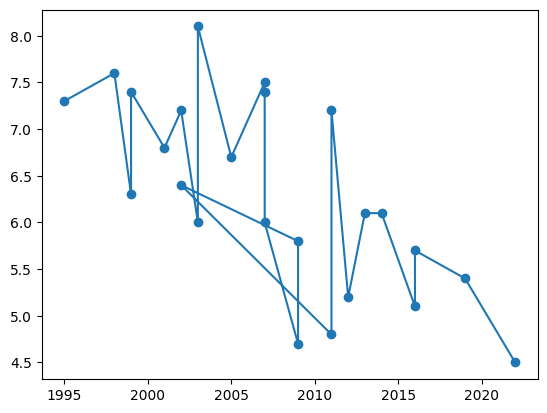

In [ ]:
test('rob zombie')

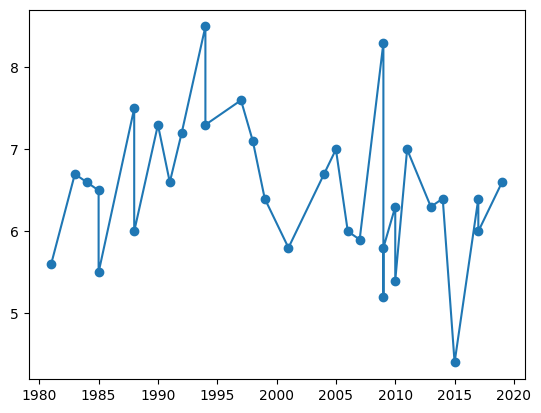

In [ ]:
test('besson')

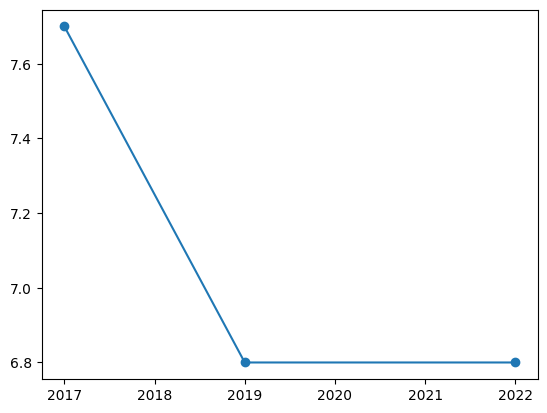

In [ ]:
test('jordan peele')

In [ ]:
def acteur(name, n=0):
    person = ia.get_person(ia.search_person(name)[0].personID)
    if n:
         lstfilms = person.get('actor')[:n]
    else:
        lstfilms = person.get('actor')

    lstfilms2 = []
    for i in lstfilms:
        lstfilms2.append(ia.get_movie(i.movieID))
    x = [i.get('year') for i in lstfilms2]
    y = [i.get('rating') for i in lstfilms2]

    plt.scatter(x, y)
    plt.plot(x, y)
    plt.show()

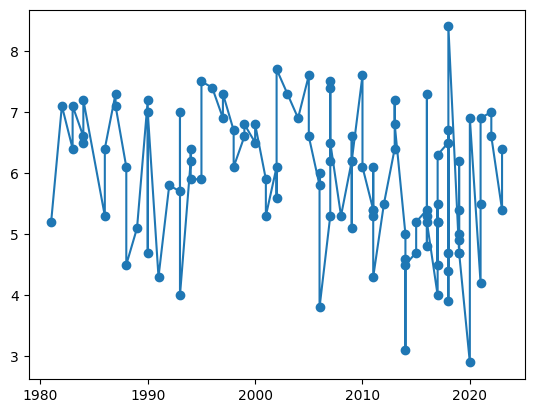

In [ ]:
acteur('nicolas cage')